# REAL OR FAKE NEWS ANALYSIS

ABOUT THE DATASET

This dataset consists of about 40000 articles consisting of fake as well as real news. Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake.The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each.

## Business Objective:

1.	Need to classify the fake and real news accurately.

Architecture level analysis:

1.	Data transformation/Text processing using Python
2.	Need to get sentiments Analysis and n-gram analysis with some charts like histogram, Density plot, Barplot, pie-plot etc. 
3.	Deployment through R Shiny or Flask/ Streamlit



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
fake=pd.read_csv('Fake.csv',encoding='latin-1')

In [75]:
true=pd.read_csv('True.csv',encoding='latin-1',error_bad_lines=False)

Skipping line 11067: expected 4 fields, saw 8



In [5]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


#### so we can see that all the data in our dataset is catagorical
NOTE: You can see that all of the datetime related columns are not currently in datetime format. We will need to convert these later.

In [7]:
fake.shape

(23481, 4)

In [8]:
true.shape

(21416, 4)

fake dataset have 23481 ROWS and 4 COLUMNS

true dataset have 21416 ROWS and 4 COLUMNS

# Checking for Missing Data 

In [9]:
def missing_data(df):
    """
    Objective
    ----------
    it shows the missing data in each column with 
    total missing values, percentage of missing value and
    its data type in descending order.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    
    returns
    ----------
    missing_data: output data frame(pandas dataframe)
    
    """
    
    total = df.isna().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isna().count()  * 100).sort_values(ascending=False))
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],axis=1,keys=['Total','Percent','Data_Type']).sort_values("Total", axis = 0, ascending = False)
    
    return missing_data

In [10]:
missing_data(true)

,Total,Percent,Data_Type
title,0,0.0,object
text,0,0.0,object
subject,0,0.0,object
date,0,0.0,object


In [11]:
missing_data(fake)

,Total,Percent,Data_Type
title,0,0.0,object
text,0,0.0,object
subject,0,0.0,object
date,0,0.0,object


we can clearly conclude that we don't have any missing data in our dataset .... GOOD to GO!!

# Lets Check For Duplicates in our Dataset 

In [76]:
def drop_duplicates(df):
    """
    Objective
    ----------
    Drop duplicates rows in data frame except for the first occurrence.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
        
    returns
    ----------
    dataframe with all unique rows
    """
        
    try:
        dr = df.duplicated().value_counts()
        print("[INFO] Dropping {} duplicates records...".format(dr))
        f_df = df.drop_duplicates(keep="first")
        
        return f_df
    except KeyError:
        print("[INFO] No duplicates records found")
        return df

In [77]:
true=drop_duplicates(true)

[INFO] Dropping False    21210
True       206
dtype: int64 duplicates records...


In [78]:
fake=drop_duplicates(fake)

[INFO] Dropping False    23478
True         3
dtype: int64 duplicates records...


In [15]:
true.shape

(21210, 4)

In [16]:
fake.shape

(23478, 4)

In [ ]:
#Previously we had :                                                   After Removing Duplicates we have :

fake dataset have 23481 ROWS and 4 COLUMNS                            fake dataset have 23478 ROWS and 4 COLUMNS

true dataset have 21416 ROWS and 4 COLUMNS                            true dataset have 21210 ROWS and 4 COLUMNS 


### Statistics View
Now let's look at some statistics about the datasets

In [17]:
fake.describe()

,title,text,subject,date
count,23478,23478,23478,23478
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [18]:
true.describe()

,title,text,subject,date
count,21210,21210,21210,21210
unique,20825,21191,2,716
top,Factbox: Trump fills top jobs for his administ...,"CHARLESTON, S.C. (Reuters) - Long viewed by th...",politicsNews,"December 6, 2017"
freq,14,2,11219,166


# Data visualization
Now let's dive a bit deeper into the dataframes

<Axes: xlabel='subject', ylabel='count'>

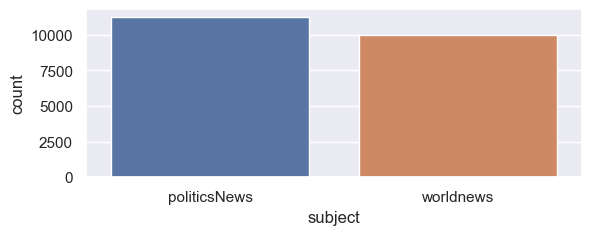

In [19]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(3.7,8.27)})
ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = true, x = 'subject', ax = ax1)

<Axes: xlabel='subject', ylabel='count'>

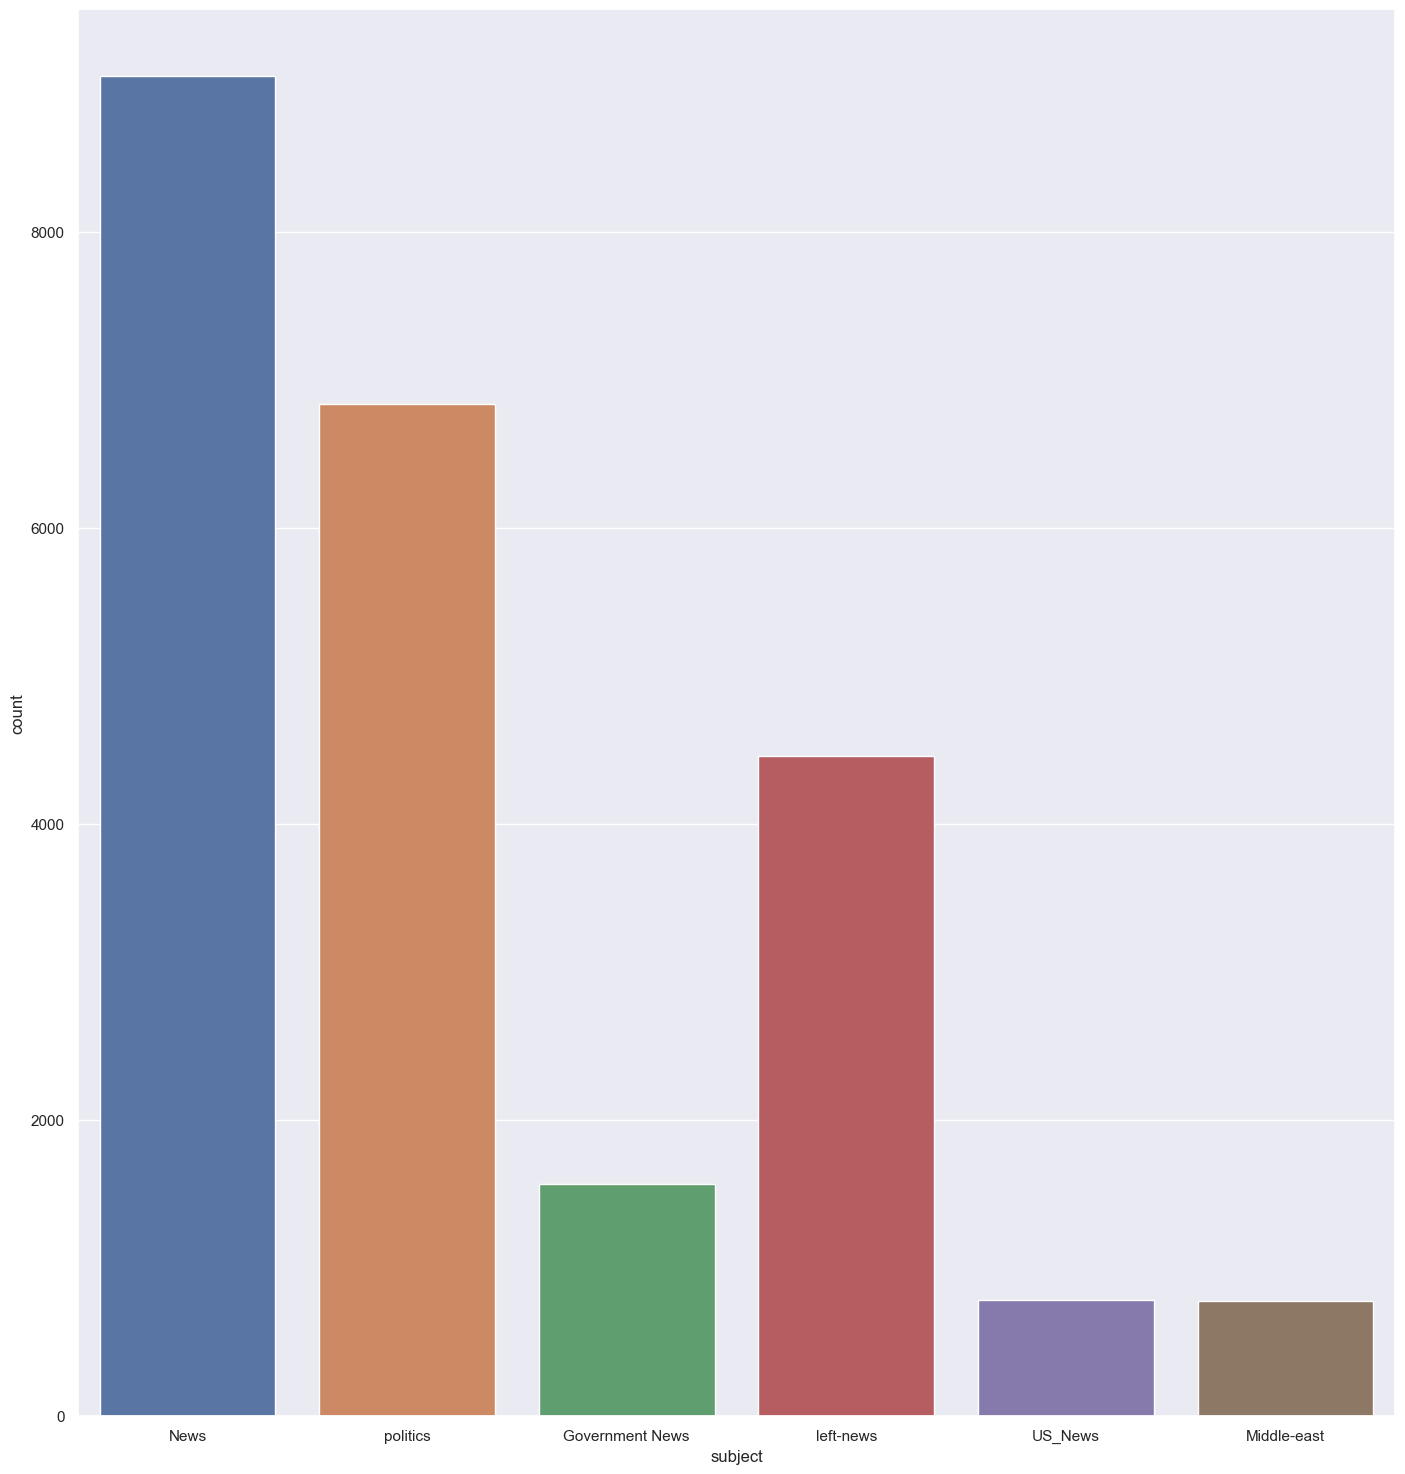

In [21]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(17,18.27)})
ax1 = fig.add_subplot(1,1,1) 
sns.countplot(data = fake, x = 'subject', ax = ax1)

After looking into the visualtion of different subject of fake news and comparing it with subjects of true news we can figure out the following things-

1)we have only 2 subjects in true ('politicsNews', 'worldnews') while fake have 6 subjects ('News', 'politics', 'Government News', 'left-news', 'US_News', 'Middle-east) .

2) since we are dealing with supervised machine learing model our ulimate goal should always be to make our model as simple as possible

with this goal we can apply some feature engineering into our fake dataset where we can merge 'News', 'left-news', 'US_News', 'Middle-east as 'worldnews' and merge 'politics', 'Government News'as 'politicsNews'



# Feature_Engineering

In [79]:
true.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [80]:
fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [81]:
fake['subject'] = fake['subject'].replace(['News'], 'worldnews')
fake['subject'] = fake['subject'].replace(['left-news'], 'worldnews')
fake['subject'] = fake['subject'].replace(['US_News'], 'worldnews')
fake['subject'] = fake['subject'].replace(['Middle-east'], 'worldnews')
fake['subject'] = fake['subject'].replace(['politics'], 'politicsNews')
fake['subject'] = fake['subject'].replace(['Government News'], 'politicsNews')

In [83]:
fake.subject.unique()

array(['worldnews', 'politicsNews'], dtype=object)

[Text(0.5, 0, 'True_Subject'), Text(0, 0.5, 'count')]

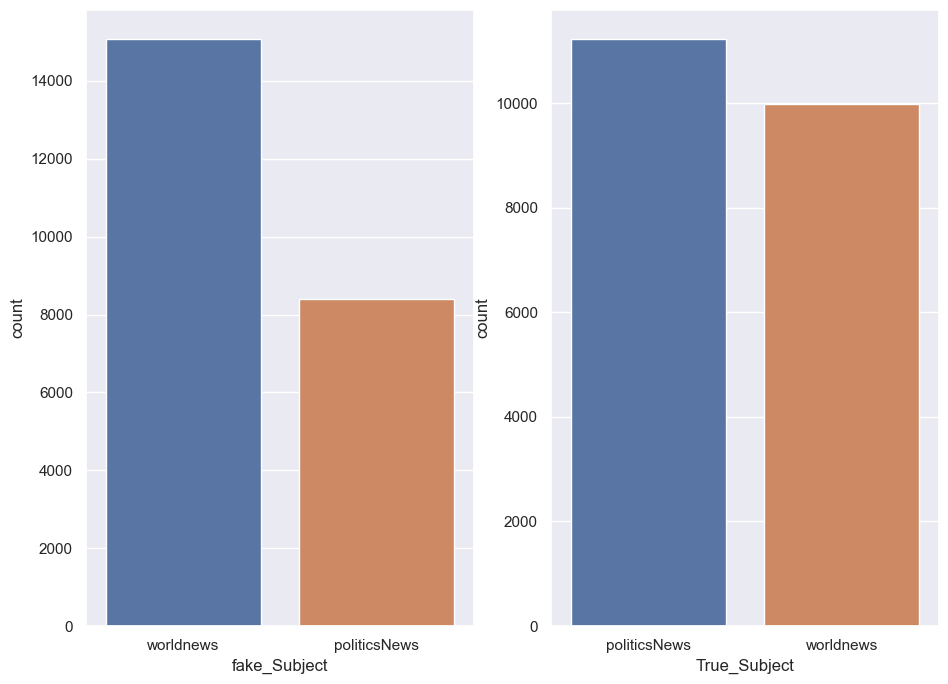

In [26]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(11,8)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
sns.countplot(data = fake, x = 'subject', ax = ax1,).set(xlabel='fake_Subject', ylabel='count')
sns.countplot(data = true, x = 'subject', ax = ax2).set(xlabel='True_Subject', ylabel='count')


# Converting the date feature into months and years

In [84]:
from datetime import datetime
import calendar
true['date'] = pd.to_datetime(true['date'], errors='coerce')
num = true['date'].dt.month

In [85]:
fake['date'] = pd.to_datetime(fake['date'], errors='coerce')
num = fake['date'].dt.month

In [86]:
true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21210 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    21210 non-null  object        
 1   text     21210 non-null  object        
 2   subject  21210 non-null  object        
 3   date     21210 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 828.5+ KB


In [87]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    23478 non-null  object        
 1   text     23478 non-null  object        
 2   subject  23478 non-null  object        
 3   date     23468 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 917.1+ KB


In [89]:
fake['Month'] = fake.date.apply(lambda x:x.month)
fake['Year'] = fake.date.apply(lambda x:x.year)

In [90]:
true['Month'] = true.date.apply(lambda x:x.month)
true['Year'] = true.date.apply(lambda x:x.year)

In [91]:
fake.head()

,title,text,subject,date,Month,Year
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,worldnews,2017-12-31,12.0,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,worldnews,2017-12-31,12.0,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",worldnews,2017-12-30,12.0,2017.0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",worldnews,2017-12-29,12.0,2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,worldnews,2017-12-25,12.0,2017.0


In [92]:
del fake['date']
del true['date']

In [95]:
true.head()

,title,text,subject,Month,Year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,12,2017


In [97]:
fake.head()

,title,text,subject,Month,Year
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,worldnews,12.0,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,worldnews,12.0,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",worldnews,12.0,2017.0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",worldnews,12.0,2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,worldnews,12.0,2017.0


[Text(0.5, 0, 'True_Subject'), Text(0, 0.5, 'count')]

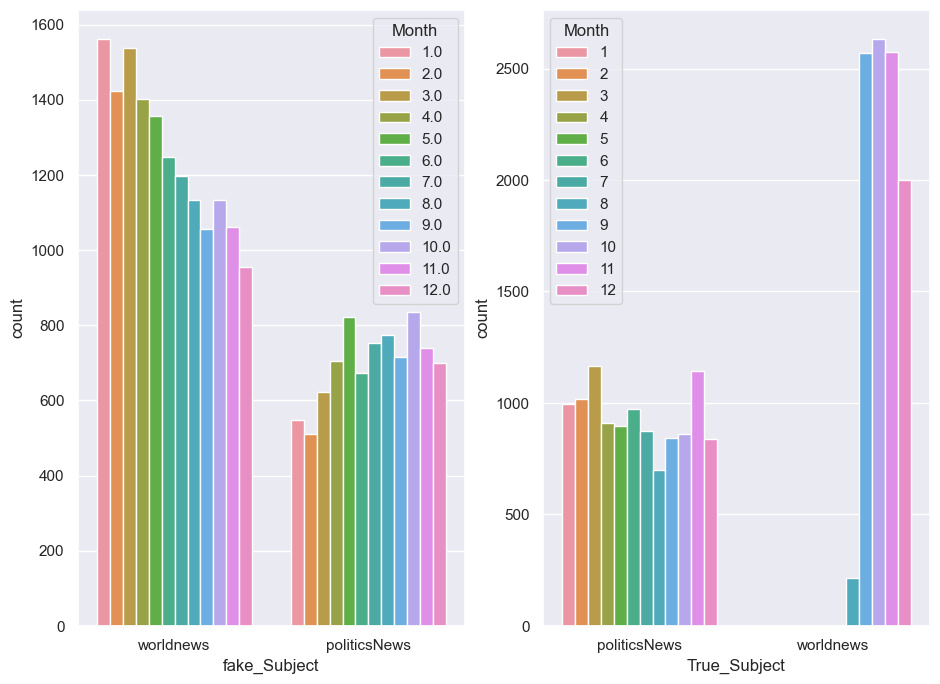

In [130]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(11,8)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
sns.countplot(data = fake, x = 'subject', hue='Month',ax = ax1,).set(xlabel='fake_Subject', ylabel='count')
sns.countplot(data = true, x = 'subject',hue='Month', ax = ax2).set(xlabel='True_Subject', ylabel='count')

### Hence with this analysis with month we can clearly see that for true worldnews we have most of the news from SEPT to DEC 

[Text(0.5, 0, 'True_Subject'), Text(0, 0.5, 'count')]

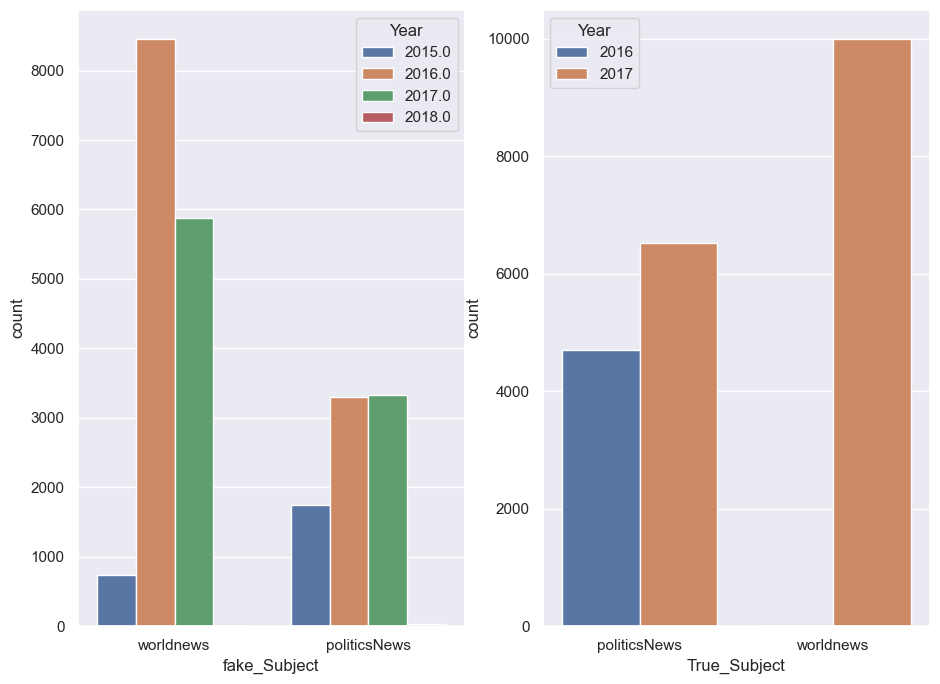

In [120]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(11,8)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
sns.countplot(data = fake, x = 'subject', hue='Year',ax = ax1,).set(xlabel='fake_Subject', ylabel='count')
sns.countplot(data = true, x = 'subject',hue='Year', ax = ax2).set(xlabel='True_Subject', ylabel='count')


### We can see that most of the true news revolvs around 2017 and 2016 and more of that in 2017 we have most of  the true world news 

# Data Cleaning
Now we are moving ahead with cleaning our data

Removal of HTML Contents

Removal of Punctuation Marks and Special Characters

Removal of Stopwords

Lemmatization

### First of all we are  mearging our tile,subject with text in to a single column 'text' to continue with our data cleaning process

In [98]:
fake['text']= fake['subject'] + " " + fake['title'] + " " + fake['text']
del fake['subject']
del fake['title']
fake.head()

,text,Month,Year
0,worldnews Donald Trump Sends Out Embarrassing...,12.0,2017.0
1,worldnews Drunk Bragging Trump Staffer Starte...,12.0,2017.0
2,worldnews Sheriff David Clarke Becomes An Int...,12.0,2017.0
3,worldnews Trump Is So Obsessed He Even Has Ob...,12.0,2017.0
4,worldnews Pope Francis Just Called Out Donald...,12.0,2017.0


In [99]:
true['text']= true['subject'] + " " + true['title'] + " " + true['text']
del true['subject']
del true['title']
true.head()


,text,Month,Year
0,"politicsNews As U.S. budget fight looms, Repub...",12,2017
1,politicsNews U.S. military to accept transgend...,12,2017
2,politicsNews Senior U.S. Republican senator: '...,12,2017
3,politicsNews FBI Russia probe helped by Austra...,12,2017
4,politicsNews Trump wants Postal Service to cha...,12,2017


In [100]:
from bs4 import BeautifulSoup
import re
import nltk
import string
from nltk.corpus import stopwords  

In [101]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)


In [102]:
def cleaning(text):
    text = remove_html(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: cleaning(x)

In [103]:
true.head()

,text,Month,Year
0,"politicsNews As U.S. budget fight looms, Repub...",12,2017
1,politicsNews U.S. military to accept transgend...,12,2017
2,politicsNews Senior U.S. Republican senator: '...,12,2017
3,politicsNews FBI Russia probe helped by Austra...,12,2017
4,politicsNews Trump wants Postal Service to cha...,12,2017


In [104]:
fake.head()

,text,Month,Year
0,worldnews Donald Trump Sends Out Embarrassing...,12.0,2017.0
1,worldnews Drunk Bragging Trump Staffer Starte...,12.0,2017.0
2,worldnews Sheriff David Clarke Becomes An Int...,12.0,2017.0
3,worldnews Trump Is So Obsessed He Even Has Ob...,12.0,2017.0
4,worldnews Pope Francis Just Called Out Donald...,12.0,2017.0


# FAKE DATASET

In [105]:
fake['text']=fake['text'].apply(cleaning)


In [34]:
fake.head()

,text,Month,Year
0,worldnews donald trump sends out embarrassing...,12.0,2017.0
1,worldnews drunk bragging trump staffer starte...,12.0,2017.0
2,worldnews sheriff david clarke becomes an int...,12.0,2017.0
3,worldnews trump is so obsessed he even has ob...,12.0,2017.0
4,worldnews pope francis just called out donald...,12.0,2017.0


In [112]:
#num of Words 
fake['num_words']=fake['text'].apply(lambda x:len(nltk.word_tokenize(x)))
fake.head()

,text,Month,Year,num_words
0,worldnews donald trump send embarrass new year...,12.0,2017.0,259
1,worldnews drink brag trump staffer start russi...,12.0,2017.0,187
2,worldnews sheriff david clarke become internet...,12.0,2017.0,314
3,worldnews trump obsess even obamas name cod w...,12.0,2017.0,245
4,worldnews pope francis call donald trump chris...,12.0,2017.0,219


In [129]:
#num of sentence 
fake['num_sent']=fake['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
del fake['num_sent']

In [106]:
#Word frequency for fake dataset
freq = pd.Series(' '.join(fake['text']).split()).value_counts()[:20] # for top 50
freq

the      532274
to       298881
of       240688
and      227656
a        213759
in       168756
that     150806
s        129212
is       113405
for       96659
on        84764
trump     80454
it        79332
he        78393
was       68520
with      65286
his       59604
as        56696
this      56030
be        49426
dtype: int64

In [107]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
fake['text'] = fake['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [108]:
#word frequency after removal of stopwords in fake dataset
freq_fk = pd.Series(' '.join(fake['text']).split()).value_counts()[:20] # for top 50
freq_fk

trump        80454
said         31196
president    26523
people       26377
would        23658
one          23429
us           22986
obama        19520
clinton      18865
like         17959
donald       17919
also         15245
hillary      15219
worldnews    15070
new          14998
news         14860
even         13835
white        13550
time         12941
state        12893
dtype: int64

In [109]:
#Lets perfom lamatization into entire dataset
def lemmatize_words(text):
        lemma = nltk.WordNetLemmatizer()
        words = text.split()
        words = [lemma.lemmatize(word,pos='v') for word in words]
        return ' '.join(words)

In [110]:
fake['text'] = fake['text'].apply(lemmatize_words)

In [111]:
#word frequency after lamatization in fake dataset
freq_fk = pd.Series(' '.join(fake['text']).split()).value_counts()[:100] # for top 100
freq_fk

trump        80807
say          52572
president    26523
people       26468
go           24848
             ...  
americans     6423
accord        6371
never         6367
really        6358
day           6333
Length: 100, dtype: int64

### Now as per our analysis lets add the top 100 most frequently occuring common words into stop words 

In [73]:
new_stopwords = ['trump','say','president','people','go','make','state','would','one','us','get','obama','clinton','time','take','donald','tell','also','worldnews','new','white','come','call','right','want','use','house','campaign','report','see','vote','give','work','could','first','back','many','republican','attack','country','government','need','support','two','politicsnews','years','election','unite','party','last','group','include','may','political','republicans','former','national','bill','law','help','year','accord']

In [81]:
stop.extend(new_stopwords)

In [75]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [77]:
fake['text'] = fake['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [82]:
stop = nltk.corpus.stopwords.words('english')
stop.extend(new_stopwords)


In [78]:
fake['text']

0        send embarrass years eve message disturb wish...
1        drink brag staffer start russian collusion inv...
2        sheriff david clarke become internet joke thre...
3        obsess even obamas name cod website image chr...
4        pope francis christmas speech pope francis ann...
                               ...                        
23476    mcpain john mccain furious iran treat sailors ...
23477    justice yahoo settle email privacy classaction...
23478    sunnistan ally safe zone plan territorial bo...
23479    blow million al jazeera america finally quit c...
23480    navy sailors hold iranian military  sign neoc...
Name: text, Length: 23478, dtype: object

# TRUE DATASET

In [114]:
true['text']=true['text'].apply(cleaning)

In [115]:
#Word frequency for true dataset
freq = pd.Series(' '.join(true['text']).split()).value_counts()[:20] # for top 50
freq

the      476757
to       249921
of       205526
a        196017
in       183013
and      180094
on       110289
said      97861
that      86189
for       81549
with      55359
is        55216
he        52952
as        47791
by        47674
was       47439
trump     46780
it        46289
has       45901
us        44646
dtype: int64

In [116]:
#removing stopwords
stop = stopwords.words('english')
true['text'] = true['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [120]:
#num of Words 
true['num_words']=true['text'].apply(lambda x:len(nltk.word_tokenize(x)))
true.head()

,text,Month,Year,num_words
0,politicsnews us budget fight loom republicans ...,12,2017,451
1,politicsnews us military accept transgender re...,12,2017,384
2,politicsnews senior us republican senator let ...,12,2017,271
3,politicsnews fbi russia probe help australian ...,12,2017,236
4,politicsnews trump want postal service charge ...,12,2017,495


In [131]:
#num of sentence
#true['num_sent']=true['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
del true['num_sent']

In [130]:
#word frequency after removal of stopwords in fake dataset
freq_tr = pd.Series(' '.join(true['text']).split()).value_counts()[:20] # for top 20
freq_tr

say           116735
trump          47560
us             44646
state          35736
would          31380
reuters        28071
president      25720
house          18688
government     18111
new            17495
republican     15834
also           15764
unite          15629
tell           15584
people         15085
make           14555
party          14094
could          13757
take           13622
last           12809
dtype: int64

In [118]:
#Lets Perform Lamatization
true['text'] = true['text'].apply(lemmatize_words)

In [119]:
#word frequency after lamatization in true dataset
freq_tr = pd.Series(' '.join(true['text']).split()).value_counts()[:100] # for top 100
freq_tr

say         116735
trump        47560
us           44646
state        35736
would        31380
             ...  
get           6702
many          6699
congress      6671
help          6613
office        6537
Length: 100, dtype: int64

In [85]:
true['text']

0        budget fight looms flip fiscal script washingt...
1        military accept transgender recruits monday pe...
2        senior senator let mr mueller job washington r...
3        fbi russia probe helped australian diplomat ti...
4        wants postal service charge much amazon shipme...
                               ...                        
21411    fully committed nato backs approach afghanista...
21412    lexisnexis withdrew products chinese market lo...
21413    minsk cultural hub becomes authorities minsk r...
21414    vatican upbeat possibility pope francis visiti...
21415    indonesia buy billion worth russian jets jakar...
Name: text, Length: 21210, dtype: object

<Axes: xlabel='num_words', ylabel='Count'>

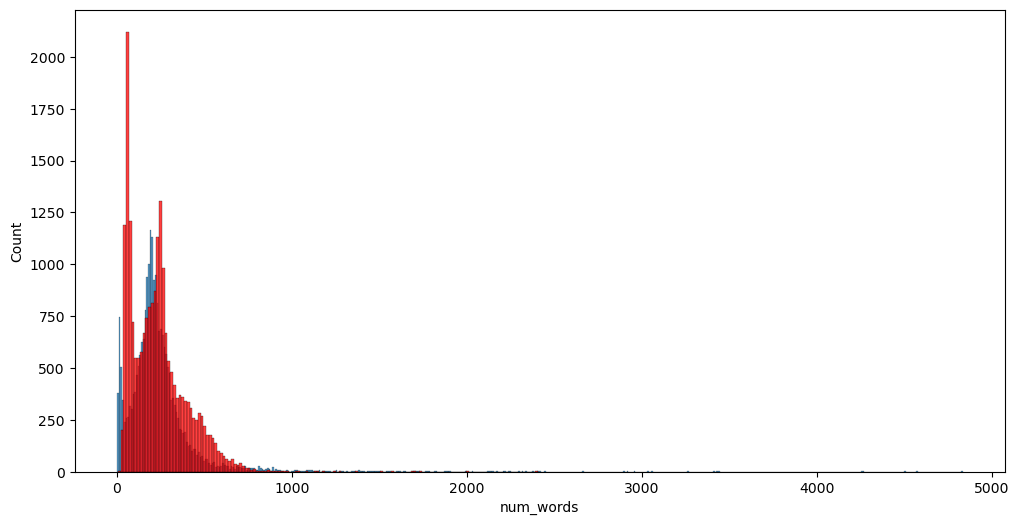

In [122]:
plt.figure(figsize=(12,6))
sns.histplot(fake['num_words'])
sns.histplot(true['num_words'],color='red')

# We can see that in true news we have more words in comparision to fake news

## Creating a dataframe 'data' 
##### Adding an Target vaeriable into our data frame assigning 1 to true and 0 to fake

In [123]:
#add column 
true['target'] = 1
fake['target'] = 0 

In [132]:
data=pd.concat([true,fake],ignore_index=True,sort=False)

In [133]:
from sklearn.utils import shuffle
data=shuffle(data)
data=data.reset_index(drop=True)


In [134]:
data.head()

,text,Month,Year,num_words,target
0,worldnews watch fireworks naacp president frea...,2.0,2017.0,160,0
1,politicsnews trump accuse us spy agencies nazi...,1.0,2017.0,545,1
2,politicsnews clinton heavily favor win elector...,10.0,2016.0,337,1
3,politicsnews break crook sec state hillary kno...,10.0,2016.0,332,0
4,politicsnews bitter hillary claim beat trump...,5.0,2017.0,77,0


# Data visualization

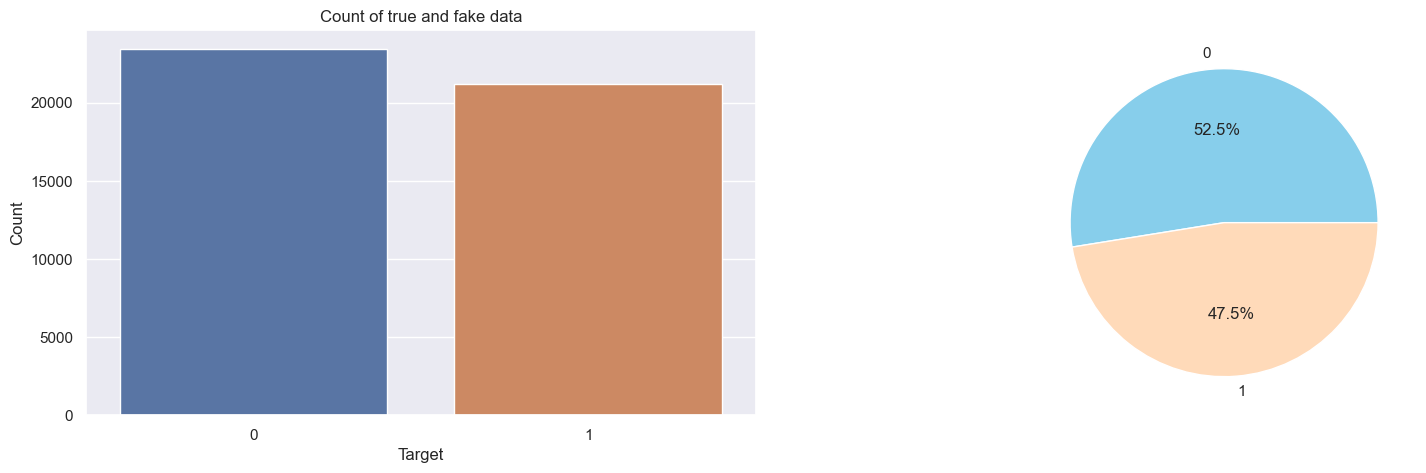

In [92]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data =data,x ='target',ax = ax[0]);
g1.set_title("Count of true and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
g2 = plt.pie(data["target"].value_counts().values,explode=[0,0],labels=data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
plt.show()

<Axes: >

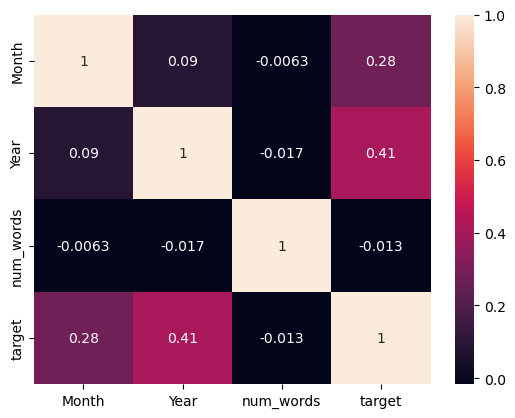

In [135]:
sns.heatmap(data.corr(),annot=True)

## But before moving towards model building techniques lets see if out target variable is effected by the sentiments of the text or not , this might be an important factor lets see ...

In [136]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()

In [139]:
check=data.text[0]

In [140]:
sia.polarity_scores(check)

{'neg': 0.106, 'neu': 0.746, 'pos': 0.148, 'compound': 0.7918}

# Although the text is fake but we are getting possitive polarity for sentimental analysis soo we can say its of no use 

# Model Building 

## Using TFIDF MAX FEATURES = 1000

In [141]:
data.head()

,text,Month,Year,num_words,target
0,worldnews watch fireworks naacp president frea...,2.0,2017.0,160,0
1,politicsnews trump accuse us spy agencies nazi...,1.0,2017.0,545,1
2,politicsnews clinton heavily favor win elector...,10.0,2016.0,337,1
3,politicsnews break crook sec state hillary kno...,10.0,2016.0,332,0
4,politicsnews bitter hillary claim beat trump...,5.0,2017.0,77,0


In [152]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
x= pd.DataFrame(denselist, columns = names_features)

In [154]:
y=data['target']

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [158]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [159]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [160]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9090400537032893
[[4236  402]
 [ 411 3889]]
0.9063155441622


In [162]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9174311926605505
[[4304  334]
 [ 404 3896]]
0.9210401891252955


In [163]:
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9618482882076527
[[4462  176]
 [ 165 4135]]
0.9591742055207608


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [175]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [176]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'GBDT':gbdt,
    
}

In [169]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [171]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9855672409935109, 0.9839870039452309)

In [177]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9855672409935109
Precision -  0.9839870039452309
For  KN
Accuracy -  0.787983889013202
Precision -  0.9017707985299032
For  NB
Accuracy -  0.9618482882076527
Precision -  0.9591742055207608
For  DT
Accuracy -  0.9951890803311703
Precision -  0.9921387283236994
For  LR
Accuracy -  0.9938464980980085
Precision -  0.9934898860730063
For  RF
Accuracy -  0.9966435444170956
Precision -  0.9951298701298701
For  AdaBoost
Accuracy -  0.9958603714477512
Precision -  0.9937456567060459
For  GBDT
Accuracy -  0.9951890803311703
Precision -  0.9921387283236994


In [181]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [182]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.996644,0.995130
6,AdaBoost,0.995860,0.993746
4,LR,0.993846,0.993490
3,DT,0.995189,0.992139
7,GBDT,0.995189,0.992139
0,SVC,0.985567,0.983987
2,NB,0.961848,0.959174
1,KN,0.787984,0.901771
